# Dataset boolean2: sentences conjoined by and

Generating sentences of the form

- 1) **c is P and d is Q, c is not P** (contradiction)

- 2) **c is P and d is Q, d is not Q** (contradiction)

- 3) **c is P and d is Q, e is (not) W** (non-contradiction)

- 4) **c is P and d is Q, c (d) is not Q(P)** (non-contradiction)

In [1]:
import numpy as np
import pandas as pd
from word_lists import name_list, positive_personality_list, condition_list
import os
import inspect
import sys
import itertools

almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions import plot_histogram_from_labels # noqa

% matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected

### Generating atoms

In [2]:
template1 = itertools.product(name_list, positive_personality_list)
template1 = list(template1)
template2 = itertools.product(name_list, condition_list)
template2 = list(template2)
upper_bound = 11000/4

### Generating all types of sentences

- 1) **c is P and d is Q, c is not P** (contradiction)

In [3]:
np.random.shuffle(template1)
all_sentences_1 = []
for i in range(int(upper_bound)):
    car, cdr = template1[i]
    caar, cdrr = car, cdr
    while caar == car and cdrr == cdr:
        new_i = np.random.choice(len(template1))
        caar, cdrr = template1[new_i]
    all_sentences_1.append("{} is {} and {} is {}, {} is not {}".format(car,cdr,caar, cdrr,car,cdr))

    
all_sentences_1 = [sentence.split(",") + [1] for sentence in all_sentences_1]

for sentence in all_sentences_1[0:10]:
    print(sentence)


['Penny is gentle and Jimmie is kind', ' Penny is not gentle', 1]
['Fannie is proud and Crystal is calm', ' Fannie is not proud', 1]
['Rosie is wonderful and Arlene is polite', ' Rosie is not wonderful', 1]
['Sean is kind and Ann is zealous', ' Sean is not kind', 1]
['Renee is wonderful and Dawn is wonderful', ' Renee is not wonderful', 1]
['Lindsay is ambitious and Morris is gentle', ' Lindsay is not ambitious', 1]
['Seth is proud and Peter is lively', ' Seth is not proud', 1]
['Paula is brave and Erin is proud', ' Paula is not brave', 1]
['Nicholas is brave and Howard is nice', ' Nicholas is not brave', 1]
['Tyler is agreeable and Angel is proud', ' Tyler is not agreeable', 1]


- 2) **c is P and d is Q, d is not Q** (contradiction)

In [4]:
np.random.shuffle(template2)
all_sentences_2 = []
for i in range(int(upper_bound)):
    car, cdr = template2[i]
    caar, cdrr = car, cdr
    while caar == car and cdrr == cdr:
        new_i = np.random.choice(len(template2))
        caar, cdrr = template2[new_i]
    all_sentences_2.append("{} is {} and {} is {}, {} is not {}".format(car,cdr,caar,cdrr,caar,cdrr))

all_sentences_2 = [sentence.split(",") + [1] for sentence in all_sentences_2]

for sentence in all_sentences_2[0:10]:
    print(sentence)    


['Jean is wrong and Candace is tender', ' Candace is not tender', 1]
['Leon is odd and Russell is hallowed', ' Russell is not hallowed', 1]
['Marion is rich and Dorothy is helpful', ' Dorothy is not helpful', 1]
['Frank is odd and Kirk is unimportant', ' Kirk is not unimportant', 1]
['Deborah is inexpensive and Adrian is better', ' Adrian is not better', 1]
['Jason is vast and Deanna is hallowed', ' Deanna is not hallowed', 1]
['Danielle is vast and Katie is wrong', ' Katie is not wrong', 1]
['Chad is careful and Willard is clever', ' Willard is not clever', 1]
['Alfred is alive and Steven is better', ' Steven is not better', 1]
['Pamela is wrong and Mary is easy', ' Mary is not easy', 1]


- 3) **c is P and d is Q, e is (not) W** (non-contradiction)

In [5]:
np.random.shuffle(template1)
np.random.shuffle(template2)
all_sentences_3 = []
for i in range(int(upper_bound)):
    car, cdr = template1[i]
    caar, cdrr = car, cdr
    while caar == car and cdrr == cdr:
        new_i = np.random.choice(len(template1))
        caar, cdrr = template1[new_i]
    third_i = np.random.choice(len(template2))
    caaar, cdrrr = template2[third_i]
    if i%2 == 0:
        my_not = "is"
    else:
        my_not = "is not"
    sentence = "{} is {} and {} is {}, {} {} {}".format(car,cdr,caar,cdrr,caaar,my_not,cdrrr)
    all_sentences_3.append(sentence)

all_sentences_3 = [sentence.split(",") + [0] for sentence in all_sentences_3]

for sentence in all_sentences_3[0:10]:
    print(sentence)

['Victoria is aggressive and Felicia is eager', ' Mamie is tender', 0]
['Ian is brave and Karen is jolly', ' Jenny is not rich', 0]
['Antonio is faithful and Jeanette is thankful', ' Olga is gifted', 0]
['John is polite and Courtney is witty', ' Jason is not vast', 0]
['Mae is proud and Charles is lively', ' Felicia is important', 0]
['Hazel is kind and Cassandra is aggressive', ' Denise is not hallowed', 0]
['Sonya is jolly and Jessie is lively', ' Janie is better', 0]
['Edward is agreeable and Warren is faithful', ' Gabriel is not famous', 0]
['Fred is brave and Maryann is aggressive', ' Cheryl is dead', 0]
['Jimmy is wonderful and Rafael is delightful', ' Suzanne is not hallowed', 0]


- 4) **c is P and d is Q, c (d) is not Q(P)** (non-contradiction)

In [6]:
np.random.shuffle(template1)
np.random.shuffle(template2)
all_sentences_4 = []
for i in range(int(upper_bound)):
    car, cdr = template1[i]
    caar, cdrr = car, cdr
    while caar == car and cdrr == cdr:
        new_i = np.random.choice(len(template2))
        caar, cdrr = template2[new_i]
    if i%2 == 0:
        caaar, cdrrr = car, cdrr
    else:
        caaar, cdrrr = caar, cdr
    sentence = "{} is {} and {} is {}, {} is not {}".format(car,cdr,caar,cdrr,caaar,cdrrr)
    all_sentences_4.append(sentence)

all_sentences_4 = [sentence.split(",") + [0] for sentence in all_sentences_4]

for sentence in all_sentences_4[0:10]:
    print(sentence)

['Katherine is zealous and Bernice is famous', ' Katherine is not famous', 0]
['Philip is jolly and Annette is important', ' Annette is not jolly', 0]
['Clifton is zealous and Jay is mealy', ' Clifton is not mealy', 0]
['Cecilia is kind and Raul is helpful', ' Raul is not kind', 0]
['Pamela is aggressive and Johnny is alive', ' Pamela is not alive', 0]
['Irene is nice and Tonya is important', ' Tonya is not nice', 0]
['Audrey is calm and Leslie is vast', ' Audrey is not vast', 0]
['Felix is lively and Leslie is famous', ' Leslie is not lively', 0]
['Jeremy is jolly and Bill is alive', ' Jeremy is not alive', 0]
['Lola is zealous and Randall is alive', ' Randall is not zealous', 0]


In [7]:
np.random.shuffle(all_sentences_1)
np.random.shuffle(all_sentences_2)
np.random.shuffle(all_sentences_3)
np.random.shuffle(all_sentences_4)



size1 = len(all_sentences_1)
size2 = len(all_sentences_2)
size3 = len(all_sentences_3)
size4 = len(all_sentences_4)

all_sentences = all_sentences_1 + all_sentences_2 + all_sentences_3 + all_sentences_4
size = len(all_sentences)

print("type 1 size = {}".format(size1))
print("type 2 size = {}".format(size2))
print("type 3 size = {}".format(size3))
print("type 4 size = {}".format(size4))
print("total size = {}".format(size))

type 1 size = 2750
type 2 size = 2750
type 3 size = 2750
type 4 size = 2750
total size = 11000


### Generating a train DataFrame with 10000 examples and a test DataFrame with 1000 examples 

In [8]:
sentence_1 = [triple[0] for triple in all_sentences]
sentence_2 = [triple[1] for triple in all_sentences]
label = [triple[2] for triple in all_sentences]

df_dict = {"sentence1": sentence_1,
           "sentence2": sentence_2,
           "label": label}
        
df = pd.DataFrame(df_dict)
df = df[["sentence1", "sentence2", "label"]]
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:10000]
df_test = df.iloc[10000:]

df.tail()    

,sentence1,sentence2,label
10995,Roland is wrong and Alicia is vast,Alicia is not vast,1
10996,Wade is agreeable and Reginald is wonderful,Guadalupe is shy,0
10997,Gary is victorious and Gwendolyn is ambitious,Marion is not famous,0
10998,Gilbert is important and Jeffrey is tender,Jeffrey is not tender,1
10999,Yolanda is silly and Blanche is wonderful,Lance is not unimportant,0


#### Looking at the label distribution

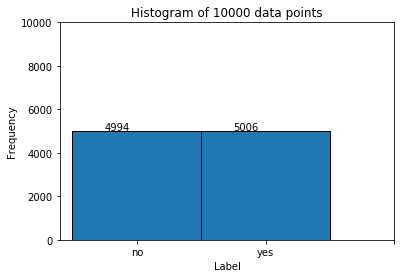

In [11]:
train_label = df_train["label"].values
plot_histogram_from_labels(train_label, ["no", "yes"], "boolean2_train.png")

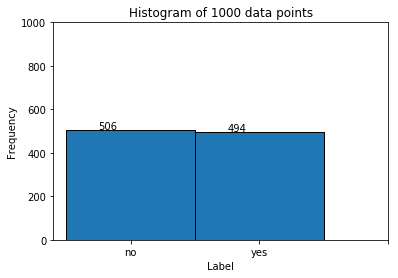

In [10]:
test_label = df_test["label"].values
plot_histogram_from_labels(test_label, ["no", "yes"], "boolean2_test.png")

### Saving to CSV

In [12]:
df_train.to_csv("boolean2_train.csv", index=False)
df_test.to_csv("boolean2_test.csv", index=False)